# PDF Sampling: The acceptance-rejection method, with different proposal distribution

Acceptance-rejection method assume we have a simpler p.d.f. $q^*(x)$ which we can easily draw samples. Our proposal distribution $q^*(x)$ must cover targeted p.d.f $p^*(x)$ in our interested region.

$q^*(x) > p^*(x), \quad \text{for all } x \quad (\text{or interested region } x)$

$Steps :$
- generate random variable $x$ in our interested region $[x_{min}, x_{max}]$
- evaluate $q^*(x)$ 
- generate random variable $y$ in the range $[0, q^*(x)]$
- if $y < p^*(x)$, then accept $x$, otherwise reject $x$.


Lets try some proposal distribution to generate p.d.f $p^*(x)$

$p^*(x) = \exp[0.4(x-0.4)^2 - 0.08x^4]$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

%matplotlib inline

In [2]:
def pdftarget(x, norm=1):
    return np.exp(0.4*(x - 0.4)*(x - 0.4) - 0.08*x*x*x*x)/norm

In [3]:
# integrate 
I = quad(pdftarget, -100, 100)
print I

(7.8521781788662155, 1.4333237621618567e-08)


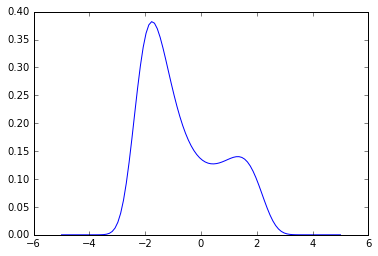

In [4]:
xmin, xmax = -5, 5
N = 100
x = np.linspace(xmin, xmax, N)
y = pdftarget(x, norm=I[0])

plt.plot(x, y)

In [5]:
def sampling(nsamples=1000, xmin=-5, xmax=5):
    I = quad(pdftarget, -100, 100) # integrate
    normalize = I[0]
    
    x = np.linspace(xmin, xmax, 1000)
    p = pdftarget(x, norm=normalize)
    yhighest = np.amax(p)
    c = 1.01*yhighest
    
    # start
    xsample = xmin + (xmax - xmin)*np.random.random(nsamples) # uniform proposal distribution
    p = pdftarget(xsample, norm=normalize)
    ysample = c*np.random.random(nsamples)
    
    accept = ysample <= p
    
    return xsample, ysample, accept, c, normalize

Let's try it

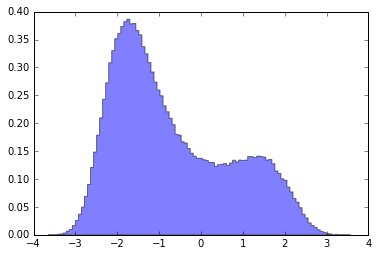

In [6]:
xsample, ysample, accept, c, normalize = sampling(nsamples=1000000)
xaccept = xsample[accept]
plt.hist(xaccept, bins=100, normed=1, histtype='stepfilled', color='blue', alpha=0.5);

### Make an animation

In [7]:
def plot_samples(xsample, ysample, accept, c, normalize, xmin=-5, xmax=5, nbins=50, write=False, filename='plot_rejection_sampling.png', trace=False):
    nsamples = len(xsample)
    ofile = '/home/ridlo/project/stats/rejection_uniform/'+filename
    
    xaccept = xsample[accept]
    n_accept = len(xaccept)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim(xmin, xmax)
    ymax = 1.2*c
    ax.set_ylim(0, ymax)
    
    x = np.linspace(xmin, xmax, 100) # draw target dist line
    target_dist = pdftarget(x, norm=normalize)
    propos_dist = np.empty_like(x)  # draw uniform dist line
    propos_dist.fill(c)
    
    ax.plot(x, target_dist, 'k')
    ax.plot(x, propos_dist, 'g')
    
    if nsamples > 0:
        if n_accept > 0:
            ax.hist(xaccept, bins=nbins, normed=1, histtype='stepfilled', color='b', linewidth=0, alpha=0.5)
    
            if trace:
                sample_x = xsample[-1] # last sample 
                sample_y = ysample[-1]
                sample_accept = accept[-1]
                ax.axvline(x=sample_x, ymin=0, ymax=(sample_y)/(ymax), c='k')
                ax.axhline(y=sample_y, xmin=xmin, xmax=(sample_x-xmin)/(xmax-xmin), c='k')
                if sample_accept:
                    ax.plot(sample_x, sample_y, 'k.')
                else:
                    ax.plot(sample_x, sample_y, 'r.')

            rate_accept = float(n_accept)/float(nsamples)
            text = r'$n_{sample} = '+'{0:d}$'.format(nsamples)+'\n'
            text += r'$r_{accept} = '+'{0:0.2f}$'.format(rate_accept)
            ax.annotate(text, xy=(0.7, 0.97), xycoords='axes fraction', ha='left', va='top') 
    
    if write:
        plt.savefig(ofile, bbox_inches='tight', dpi=300); plt.close()
    else:
        plt.show(); plt.close()

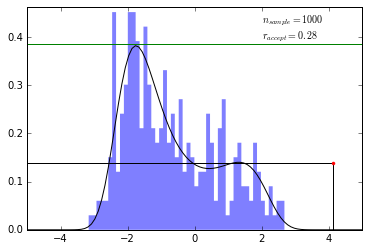

In [8]:
xsample, ysample, accept, c, normalize = sampling(nsamples=1000)
plot_samples(xsample, ysample, accept, c, normalize, trace=True)

In [145]:
# make an animation
nsample = 1000
xsample, ysample, accept, c, normalize = sampling(nsamples=nsample)
divisor = 10

for i in range(nsample):
    plot_samples(xsample[0:i], 
                ysample[0:i], 
                accept[0:i], 
                c, 
                normalize,
                write=True,
                filename='plotsample_nsamp_{0:04d}.png'.format(i),
                trace=True)
    
    if (((i+1) % divisor) == 0):
        print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [1]:
from IPython.display import YouTubeVideo

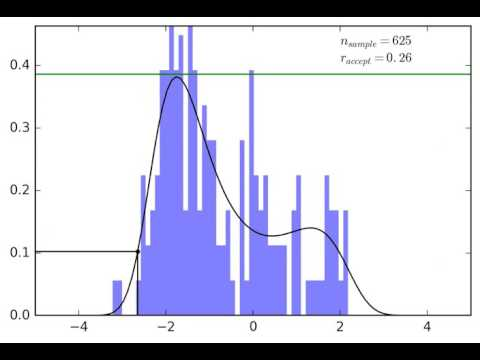

In [2]:
YouTubeVideo("hObkFth7kMs")

### References

- SEAYAC Workshop, *MC methods in astronomy*, Tri L. Astraatmadja (MPIA Heidelberg)
    Krabi, 4 December 2015